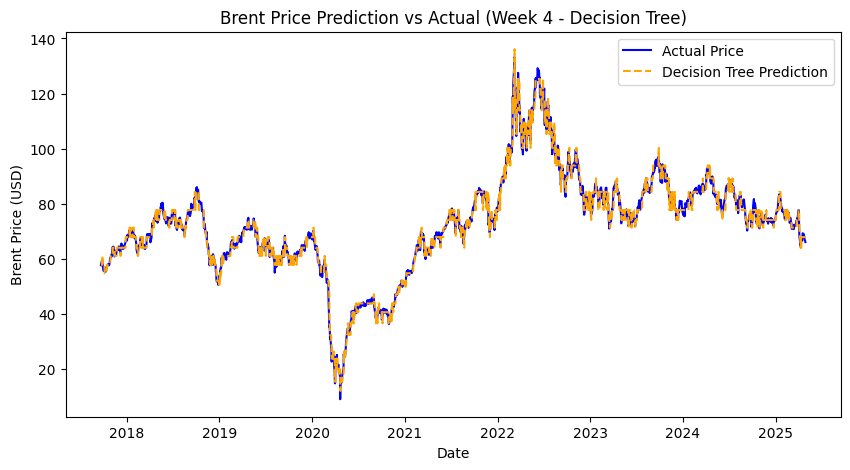

Decision Tree Mean Absolute Error (MAE): 1.64
Feature: price_previous, Importance: 0.999
Feature: pct_change, Importance: 0.000
Feature: ma_5, Importance: 0.001


In [1]:
# Brent Price Predictor - Week 4: Decision Tree Regression

import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Step 1: Load data
url = "https://raw.githubusercontent.com/datasets/oil-prices/master/data/brent-daily.csv"
df = pd.read_csv(url)

# Step 2: Clean data
df.rename(columns={'Date': 'date', 'Price': 'price'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Step 3: Create features
df['price_previous'] = df['price'].shift(1)
df['pct_change'] = df['price'].pct_change()
df['ma_5'] = df['price'].rolling(window=5).mean()

# Step 4: Drop rows with NaN values (caused by pct_change and ma_5)
df = df.dropna()

# Step 5: Define input features (X) and target (y)
X = df[['price_previous', 'pct_change', 'ma_5']].values
y = df['price'].values

# Step 6: Split data into train/test sets (80/20 split)
split_point = int(len(df) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Step 7: Train Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Step 8: Predict with Decision Tree
y_pred_tree = tree_model.predict(X_test)

# Step 9: Plot results
plt.figure(figsize=(10,5))
plt.plot(df['date'][split_point:], y_test, label='Actual Price', color='blue')
plt.plot(df['date'][split_point:], y_pred_tree, label='Decision Tree Prediction', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Brent Price (USD)')
plt.legend()
plt.title('Brent Price Prediction vs Actual (Week 4 - Decision Tree)')
plt.show()

# Step 10: Evaluate model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print("Decision Tree Mean Absolute Error (MAE):", round(mae_tree, 2))

# Step 11: Feature importance
feature_names = ['price_previous', 'pct_change', 'ma_5']
importances = tree_model.feature_importances_

for name, importance in zip(feature_names, importances):
    print(f"Feature: {name}, Importance: {importance:.3f}")
